In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add lats\longs to a list
coordinates = list(lat_lngs)
coordinates

[(-29.82330756515318, -133.5128377452734),
 (43.03443213272348, -58.69581194892709),
 (37.74962070456752, -92.36004335072896),
 (13.874988465890382, -173.03520688800307),
 (64.63560464855865, -86.72412069159536),
 (12.098282858365351, -176.43739285332134),
 (-86.05203301653705, 22.058905999039183),
 (19.060050157887048, 159.48967295933903),
 (24.517621333093587, 46.374506676280106),
 (-17.401975378729574, -0.3658348029615013),
 (-69.90213742300459, 4.6472601458552845),
 (-69.57291010549983, 67.66756749395716),
 (-35.56182951984734, 76.50524395688979),
 (-16.83368813361197, -123.53746317170851),
 (-35.943629079466575, -126.47218964391693),
 (-35.253004417114965, 1.995066994700835),
 (1.9804870614352268, -176.7505561910097),
 (-57.196200068593534, -142.89941538716974),
 (-45.2855957820014, -176.752221201128),
 (-19.220017009235093, -132.04294485061638),
 (-67.9772266479247, -4.120756899241826),
 (22.106201785696328, -94.34304774289747),
 (-0.876756163492928, 136.56073017950445),
 (-75.58

In [4]:
from citipy import citipy
import requests
from config import weather_api_key


# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1978377f60c1b767e801544d60ab8b4


In [5]:
cities = []

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

618

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
city_data = []
print("Beginning Data Retreival    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # group in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retreival    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 3 of Set 1 | lebanon
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | riyadh
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | nautla
Processing Record 19 of Set 1 | biak
Processing Record 20 of Set 1 | goderich
Processing Record

Processing Record 34 of Set 4 | vardo
Processing Record 35 of Set 4 | carthage
Processing Record 36 of Set 4 | samusu
City not found. Skipping...
Processing Record 37 of Set 4 | quatre cocos
Processing Record 38 of Set 4 | labuhan
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | tunduru
City not found. Skipping...
Processing Record 42 of Set 4 | humberto de campos
Processing Record 43 of Set 4 | hambantota
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | horsham
Processing Record 46 of Set 4 | vaitape
Processing Record 47 of Set 4 | la ligua
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | tondano
Processing Record 50 of Set 4 | tupik
Processing Record 1 of Set 5 | panixtlahuaca
City not found. Skipping...
Processing Record 2 of Set 5 | saint-joseph
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | atsiki
City not found. Skipping...
Processing Reco

Processing Record 25 of Set 8 | augustow
Processing Record 26 of Set 8 | flinders
Processing Record 27 of Set 8 | bilma
Processing Record 28 of Set 8 | fortuna
Processing Record 29 of Set 8 | ambilobe
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | ketchikan
Processing Record 34 of Set 8 | senador jose porfirio
Processing Record 35 of Set 8 | mogadishu
Processing Record 36 of Set 8 | yellowknife
Processing Record 37 of Set 8 | norman wells
Processing Record 38 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 8 | khor
Processing Record 40 of Set 8 | kurduvadi
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | sundsvall
Processing Record 43 of Set 8 | imuris
Processing Record 44 of Set 8 | pimampiro
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | jibuti
Processing Record 47 of Set 8 | rio blanco
Processing 

Processing Record 14 of Set 12 | ornskoldsvik
Processing Record 15 of Set 12 | henties bay
Processing Record 16 of Set 12 | weligama
Processing Record 17 of Set 12 | cairo
Processing Record 18 of Set 12 | marsabit
Processing Record 19 of Set 12 | dubrovka
Processing Record 20 of Set 12 | chagda
City not found. Skipping...
Processing Record 21 of Set 12 | sao joao da barra
Processing Record 22 of Set 12 | likasi
Processing Record 23 of Set 12 | miri
Processing Record 24 of Set 12 | miramar
Processing Record 25 of Set 12 | peace river
Processing Record 26 of Set 12 | shahr-e kord
Processing Record 27 of Set 12 | batken
Processing Record 28 of Set 12 | fereydun kenar
Processing Record 29 of Set 12 | kagadi
Processing Record 30 of Set 12 | sasolburg
Processing Record 31 of Set 12 | yining
Processing Record 32 of Set 12 | morristown
Processing Record 33 of Set 12 | patacamaya
Processing Record 34 of Set 12 | umea
Processing Record 35 of Set 12 | brooks
Processing Record 36 of Set 12 | cassi

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.68,69,100,7.34,PF,2022-01-03 21:00:16
1,Lebanon,36.2081,-86.2911,37.54,69,1,0.00,US,2022-01-03 21:00:21
2,Kapaa,22.0752,-159.3190,75.18,79,100,1.01,US,2022-01-03 21:00:22
3,Bredasdorp,-34.5322,20.0403,64.27,77,100,3.44,ZA,2022-01-03 20:53:03
4,Butaritari,3.0707,172.7902,80.33,69,100,14.45,KI,2022-01-03 21:00:23
5,Riyadh,24.6877,46.7219,55.81,59,0,9.46,SA,2022-01-03 21:00:23
6,Jamestown,42.0970,-79.2353,23.09,41,26,5.99,US,2022-01-03 20:57:00
7,Hermanus,-34.4187,19.2345,64.80,75,100,7.58,ZA,2022-01-03 21:00:24
8,Bambous Virieux,-20.3428,57.7575,76.21,80,77,9.17,MU,2022-01-03 21:00:24
9,Luderitz,-26.6481,15.1594,62.20,81,0,15.48,NA,2022-01-03 20:55:28


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-01-03 21:00:16,-23.1203,-134.9692,77.68,69,100,7.34
1,Lebanon,US,2022-01-03 21:00:21,36.2081,-86.2911,37.54,69,1,0.00
2,Kapaa,US,2022-01-03 21:00:22,22.0752,-159.3190,75.18,79,100,1.01
3,Bredasdorp,ZA,2022-01-03 20:53:03,-34.5322,20.0403,64.27,77,100,3.44
4,Butaritari,KI,2022-01-03 21:00:23,3.0707,172.7902,80.33,69,100,14.45
5,Riyadh,SA,2022-01-03 21:00:23,24.6877,46.7219,55.81,59,0,9.46
6,Jamestown,US,2022-01-03 20:57:00,42.0970,-79.2353,23.09,41,26,5.99
7,Hermanus,ZA,2022-01-03 21:00:24,-34.4187,19.2345,64.80,75,100,7.58
8,Bambous Virieux,MU,2022-01-03 21:00:24,-20.3428,57.7575,76.21,80,77,9.17
9,Luderitz,NA,2022-01-03 20:55:28,-26.6481,15.1594,62.20,81,0,15.48


In [12]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

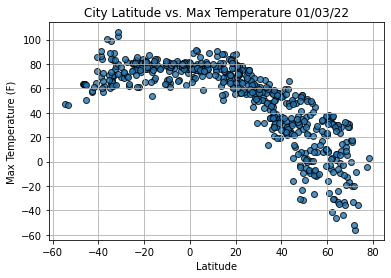

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

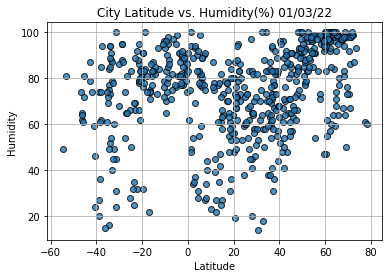

In [15]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity(%) "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

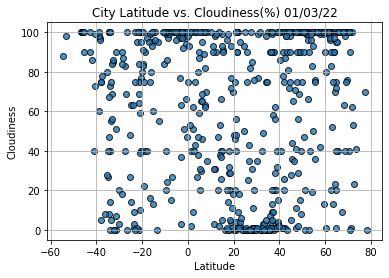

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

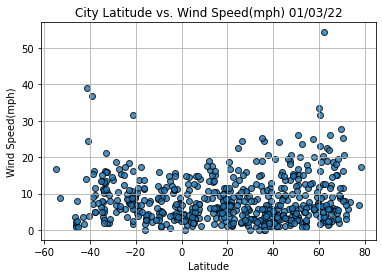

In [17]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Nautla
Country                        MX
Date          2022-01-03 21:00:25
Lat                       20.2167
Lng                      -96.7833
Max Temp                    65.82
Humidity                       56
Cloudiness                     48
Wind Speed                  11.03
Name: 13, dtype: object

In [23]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

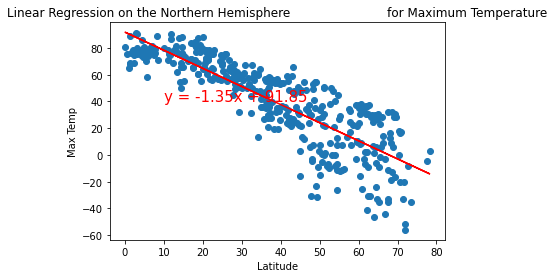

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

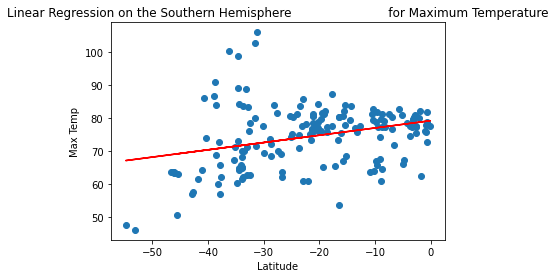

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

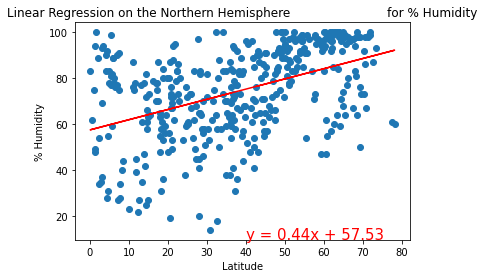

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

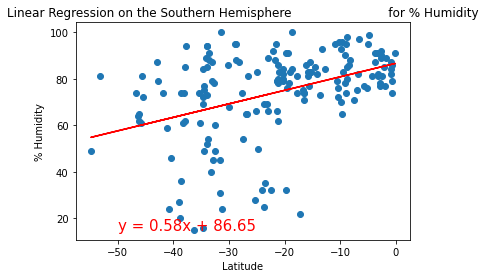

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

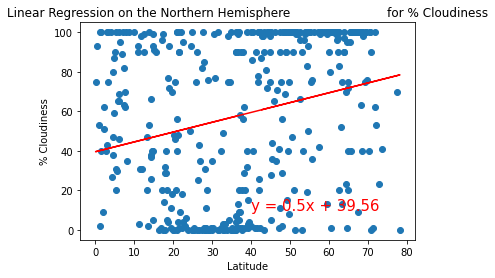

In [35]:
# Linear regression on the Northern Hemisphere % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

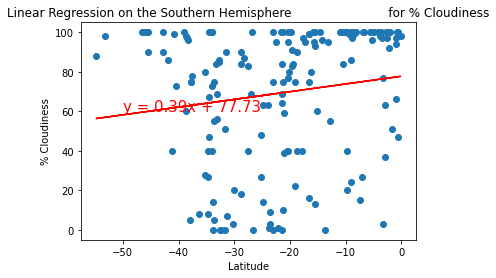

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

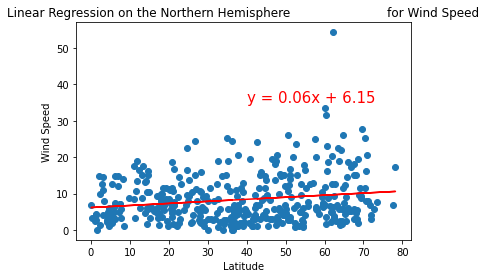

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

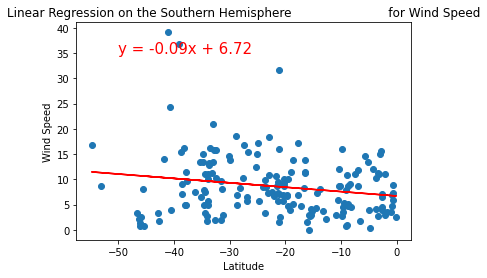

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))